In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from decimal import Decimal
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
path =r"C:/Users/mjc341/Desktop/UMAN 1543 MBS Transfer Admissions Analysis"
path

'C:/Users/mjc341/Desktop/UMAN 1543 MBS Transfer Admissions Analysis'

In [3]:
dataset = pd.read_excel(path + "/Amilcahs_FILES/XFR_ADBU_DATA_REboot2_v.13.xlsx", sheet_name="AGG_Pop", 
                     index_col=False)
dataset.head(3)

,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,GRADES
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,0,FAIL,PASS,0,NaN,NaN,NaN,NaN,NaN,"''=IF(AG2= ""A+"", ""A"",IF(AG2=""A"",""A"",IF(AG2=""A-..."
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,0,PASS,PASS,PASS,NaN,NaN,NaN,NaN,NaN,NaN
2,50475188,2158-50475188,2158,Male,0,NaN,NaN,N,N,NaN,...,0,PASS,PASS,PASS,NaN,NaN,NaN,NaN,NaN,"""""""=IF(W2=0,0,IF(W2=""A"",""PASS"",IF(W2=""A+"", ""PA..."


In [4]:
dataset.drop(columns=['GRADES','Unnamed: 64', 'Unnamed: 65',
                      'Unnamed: 66','Unnamed: 67','Unnamed: 68'],
            inplace=True)
dataset["URM"]=0
dataset.loc[dataset['ETH'] == "American Indian/Alaska Native", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Black/African American", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Hispanic/Latino", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Native Hawaiian/Other Pacific Islander", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Two or More Races", 'URM'] = 1
dataset.head(3)

,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MAS202_5_point_Scale,MAS202_FULL_Scale,FIN302_GRADE,FIN302_5_point_Scale,FIN302_FULL_Scale,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,URM
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,C,2,,,,0,FAIL,PASS,0,0
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,A,4,A-,A,4,0,PASS,PASS,PASS,0
2,50475188,2158-50475188,2158,Male,0,NaN,NaN,N,N,NaN,...,B,3,A-,A,4,0,PASS,PASS,PASS,0


No handles with labels found to put in legend.


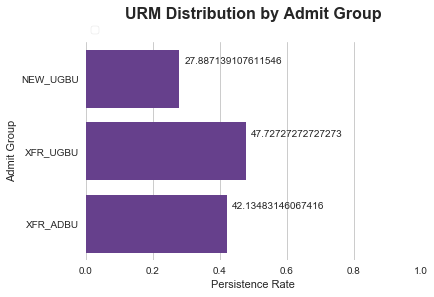

In [5]:
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="URM", y="COMBO_ADMIT", data=dataset,
            color="rebeccapurple", ci=None)

# Add a title
plt.title("URM Distribution by Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
#("%.0f%s" % (p.get_width()*100, '%'), (p.get_x() + p.get_width(), p.get_y() + 0.3)
for p in ax.patches:
    ax.annotate((p.get_width()*100),(p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
#this was a test,below this is changed into donuts
#plt.savefig(path + '/dist_urm.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [6]:
#For Yr 1 aggregate persistence
dataset2 = dataset.loc[dataset['ADMT_TERM']<2178]
#For Yr 2 aggregate persistence
dataset3 = dataset.loc[dataset['ADMT_TERM']<2168]

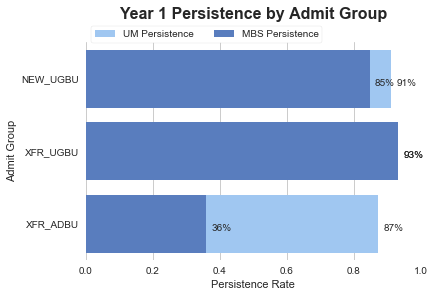

In [7]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot total UM persistence
sns.set_color_codes("pastel")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", data=dataset2,
            label="UM Persistence", color="b", ci=None)

# Plot MBS persistence
sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1", y="COMBO_ADMIT", data=dataset2,
            label="MBS Persistence", color="b", ci=None)

# Add a title
plt.title("Year 1 Persistence by Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')
    
# Save graphic to specified path
#plt.savefig(path + '/mbs_yr1_persistence.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [8]:
'''writer = pd.ExcelWriter(path + '/'+ 'Admit TERM < 2178 + '.xlsx')
dataset2.to_excel(writer,'TERMAnalysis2178')
workbook  = writer.book
worksheet = writer.sheets['TERMAnalysis2178']
writer.save() '''

"writer = pd.ExcelWriter(path + '/'+ 'Admit TERM < 2178 + '.xlsx')\ndataset2.to_excel(writer,'TERMAnalysis2178')\nworkbook  = writer.book\nworksheet = writer.sheets['TERMAnalysis2178']\nwriter.save() "

In [9]:
path

'C:/Users/mjc341/Desktop/UMAN 1543 MBS Transfer Admissions Analysis'

In [10]:
dataset2.head(2)

,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MAS202_5_point_Scale,MAS202_FULL_Scale,FIN302_GRADE,FIN302_5_point_Scale,FIN302_FULL_Scale,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,URM
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,C,2,,,,0,FAIL,PASS,0,0
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,A,4,A-,A,4,0,PASS,PASS,PASS,0


In [11]:
dataset2.to_excel('ds2.xlsx')

In [12]:
#writer = pd.ExcelWriter(path +'/'+ 'ds2.xlsx')

In [1]:
# Initialize the matplotlib figure
fig, (ax1, ax2) =plt.subplots(ncols =2, sharey =True)
sns.set_context('talk')
fig.suptitle ('Year 1 Persistence by Admit Group',y=1.09)

# Plot total UM persistence
sns.set_color_codes("pastel")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT",data=dataset2,
            label="UM Persistence", color="b", ci=None, ax = ax1)
#Add a title
#plt.title("Year 1 Persistence by Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.2)

# Plot MBS persistence
sns.set_color_codes("muted") 
sns.barplot(x="PERSIST_BU_YR1", y= 'COMBO_ADMIT', data=dataset2,
            label="MBS Persistence", color="b", ci=None, ax = ax2)


# Add a legend and informative axis label
ax1.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax1.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="")
sns.despine(left=True, bottom=False) 

ax2.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax2.set(xlim=(0, 1), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=False)

# Iterate through the list of axes' patches
for p in ax1.patches:
    ax1.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')
for p in ax2.patches:
    ax2.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')  
# Save graphic to specified path
#plt.savefig(path + '/mbs_yr1_persistence_w_2_axis.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

NameError: name 'plt' is not defined

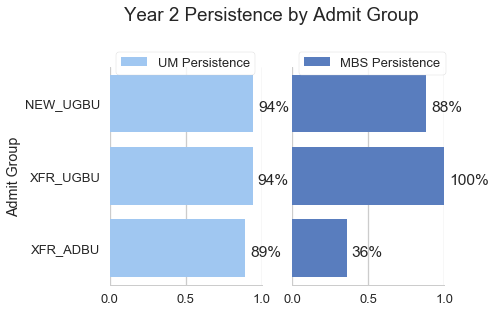

In [14]:
# Initialize the matplotlib figure
# craete 2 figures side by side share the Y axis
fig, (ax1, ax2) =plt.subplots(ncols =2, sharey =True)
sns.set_context('talk')
#create a supertitle for both figures, can have titles over each plot also using plt.title
fig.suptitle ('Year 2 Persistence by Admit Group',y=1.09)

# Plot total UM persistence on ax1
sns.set_color_codes("pastel")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT",data=dataset3,
            label="UM Persistence", color="b", ci=None, ax = ax1)
#Add a title
#plt.title("plt 1", fontweight="bold", fontsize=16, loc="center", y=1.2)

# Plot MBS persistence on ax2
sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y= 'COMBO_ADMIT', data=dataset2,
            label="MBS Persistence", color="b", ci=None, ax = ax2)

#Add a title
#plt.title("plt 2", fontweight="bold", fontsize=16, loc="center", y=1.2)

# Add a legend and informative axis label for each ax
ax1.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax1.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="")
sns.despine(left=True, bottom=False) 

ax2.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax2.set(xlim=(0, 1), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=False)

# Iterate through the list of axes' patches and annotate with a percentage
for p in ax1.patches:
    ax1.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')
for p in ax2.patches:
    ax2.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')  
# Save graphic to specified path
#plt.savefig(path + '/mbs_yr2_persistence_w_2_axis.png', dpi=300, format='png', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [15]:
#create an excel file and send it to the path folder
writer = pd.ExcelWriter(path +'/'+ 'ds2.xlsx')
writer.save()

In [16]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

In [17]:
dataset2.head()

,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MAS202_5_point_Scale,MAS202_FULL_Scale,FIN302_GRADE,FIN302_5_point_Scale,FIN302_FULL_Scale,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,URM
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,C,2,,,,0,FAIL,PASS,0,0
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,A,4,A-,A,4,0,PASS,PASS,PASS,0
2,50475188,2158-50475188,2158,Male,0,NaN,NaN,N,N,NaN,...,B,3,A-,A,4,0,PASS,PASS,PASS,0
3,50480064,2158-50480064,2158,Female,1,5125.0,2016.0,Y,Y,62342.0,...,,,,,,0,0,0,0,1
4,50480105,2158-50480105,2158,Female,0,98414.0,2016.0,Y,Y,62342.0,...,B,3.33,B,B,3,0,PASS,PASS,PASS,1


In [18]:
dataset2.columns

Index(['ID', 'XFR_BUS_UNIQUE_ID', 'ADMT_TERM', 'GENDER', 'FGEN', 'IM_EFC',
       'AY', 'PROFILE', 'FAFSA', 'COA', 'NDRK', 'NDRK7', 'FULL_TIME',
       'ADMIT_TYPE', 'EXT ORG ID', 'CEEB', 'Transfer Inst', 'AACSB',
       'Transfer Inst Type', 'Calc Ready', 'SCHOOL', 'ETH', 'UGBU_ADBU',
       'COMBO_ADMIT', 'INIT_BMK_MAJOR_16', 'DEGREE_TYPE', 'MTH 161 Ready',
       'PRECALC-1 Ready', 'PRECALC Ready', 'ALGEBRA Ready', 'MTH161_CREDIT',
       'MAS201_CREDIT(12)', 'MTH161_TERM', 'MAS201_TERM', 'MR_GPA',
       'ACAD_LEVEL', 'PERSIST_YR1', 'PERSIST_YR2', 'PERSIST_YR2_DEC_N',
       'PERSIST_BU_YR1', 'PERSIST_BU_YR1_OF_PERSIST', 'PERSIST_BU_YR2',
       'PERSIST_BU_YR2_OF_PERSIST', 'PERSIST_BU_YR2_DEC_N',
       'BM/OTHERSCHOOL 2168', 'BM SCHOOL 2168', 'BM SCHOOL2178', 'AA_DEGREE',
       'MTH161_GRADE', 'MTH161_5pt_SCALE', 'MTH161_FULL_Scale', 'MAS201_GRADE',
       'MAS201_5Pt_Scale (25)', 'MAS201_FULL_Scale', 'MAS202_GRADE',
       'MAS202_5_point_Scale', 'MAS202_FULL_Scale', 'FIN302_GR

In [19]:
len(dataset2)

1145

In [20]:
len(dataset)

1790

In [21]:
dataset.head(2)

,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MAS202_5_point_Scale,MAS202_FULL_Scale,FIN302_GRADE,FIN302_5_point_Scale,FIN302_FULL_Scale,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,URM
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,C,2,,,,0,FAIL,PASS,0,0
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,A,4,A-,A,4,0,PASS,PASS,PASS,0


In [22]:
dataset2.head(2)

,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MAS202_5_point_Scale,MAS202_FULL_Scale,FIN302_GRADE,FIN302_5_point_Scale,FIN302_FULL_Scale,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,URM
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,C,2,,,,0,FAIL,PASS,0,0
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,A,4,A-,A,4,0,PASS,PASS,PASS,0


In [23]:
persistyr1_table = dataset2.pivot_table(index=["COMBO_ADMIT","URM"],values=["ID"],
                       columns=['PERSIST_YR1'], aggfunc=[#np.mean,
                           len],margins=True, margins_name= 'Total',fill_value=0)

persistyr1_table.div( persistyr1_table.iloc[:,-1], axis=0 ).mul(100).round(0)

len             
                   ID             
PERSIST_YR1       0.0   1.0  Total
COMBO_ADMIT URM                   
NEW_UGBU    0    10.0  90.0  100.0
            1     6.0  94.0  100.0
XFR_ADBU    0    12.0  88.0  100.0
            1    14.0  86.0  100.0
XFR_UGBU    0     6.0  94.0  100.0
            1     7.0  93.0  100.0
Total             9.0  91.0  100.0

In [28]:
persistyr1_table = dataset2.pivot_table(index=["COMBO_ADMIT",],values=["ID"],
                       columns=['PERSIST_YR1'], aggfunc=[#np.mean,
                           len],margins=True, margins_name= 'Total',fill_value=0)

persistyr1_table.div( persistyr1_table.iloc[:,-1], axis=0 ).mul(100).round(0)

len             
               ID             
PERSIST_YR1   0.0   1.0  Total
COMBO_ADMIT                   
NEW_UGBU      9.0  91.0  100.0
XFR_ADBU     13.0  87.0  100.0
XFR_UGBU      7.0  93.0  100.0
Total         9.0  91.0  100.0

In [37]:
persistyr1_table = dataset2.pivot_table(index=["COMBO_ADMIT",],values=["ID"],
                       columns=['PERSIST_YR1'], aggfunc=[len],margins=True, margins_name= 'Total',fill_value=0)

persistyr1_table.div( persistyr1_table.iloc[:,-1], axis=0 ).mul(100).round(0)

len             
               ID             
PERSIST_YR1   0.0   1.0  Total
COMBO_ADMIT                   
NEW_UGBU      9.0  91.0  100.0
XFR_ADBU     13.0  87.0  100.0
XFR_UGBU      7.0  93.0  100.0
Total         9.0  91.0  100.0

In [39]:
Counted = dataset2.pivot_table(index = ['COMBO_ADMIT'], values = ['ID'], columns =['PERSIST_YR1'], aggfunc ='count')
Counted['Totals'] = Counted.sum(axis ='columns')
Counted = Counted.sort_values('Totals', ascending = False)
Counted

ID      Totals
PERSIST_YR1 0.0  1.0       
COMBO_ADMIT                
NEW_UGBU     86  896    982
XFR_ADBU     13   90    103
XFR_UGBU      4   56     60

In [40]:
"""INSTRUCTIONS
100XP
Construct a pivot table counted from the DataFrame medals aggregating by count. Use 'NOC' as the index, 'Athlete' for the values, and 'Medal' for the columns.
Modify the DataFrame counted by adding a column counted['totals']. The new column 'totals' should contain the result of taking the sum along the columns (i.e., use .sum(axis='columns')).
Overwrite the DataFrame counted by sorting it with the .sort_values() method. Specify the keyword argument ascending=False.
Print the first 15 rows of counted using .head(15). This has been done for you, so hit 'Submit Answer' to see the result.
'''
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))"""

"INSTRUCTIONS\n100XP\nConstruct a pivot table counted from the DataFrame medals aggregating by count. Use 'NOC' as the index, 'Athlete' for the values, and 'Medal' for the columns.\nModify the DataFrame counted by adding a column counted['totals']. The new column 'totals' should contain the result of taking the sum along the columns (i.e., use .sum(axis='columns')).\nOverwrite the DataFrame counted by sorting it with the .sort_values() method. Specify the keyword argument ascending=False.\nPrint the first 15 rows of counted using .head(15). This has been done for you, so hit 'Submit Answer' to see the result.\n'''\n# Construct the pivot table: counted\ncounted = medals.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')\n\n# Create the new column: counted['totals']\ncounted['totals'] = counted.sum(axis='columns')\n\n# Sort counted by the 'totals' column\ncounted = counted.sort_values('totals', ascending=False)\n\n# Print the top 15 rows of counted\nprint(counte

In [41]:
Counted2 = dataset.pivot_table(index = ['COMBO_ADMIT'], values = ['ID'], columns =['PERSIST_YR1'], aggfunc ='count')
Counted2['Totals'] = Counted2.sum(axis ='columns')
Counted2 = Counted2.sort_values('Totals', ascending = False)
Counted2

ID      Totals
PERSIST_YR1 0.0  1.0       
COMBO_ADMIT                
NEW_UGBU     86  896    982
XFR_ADBU     13   90    103
XFR_UGBU      4   56     60

In [42]:
len(dataset2)

1145